# Using Pandas, IPython Widgets and Basemap #

In the following example we use Pandas to read in a table into a DataFrame object a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). We show how a selection of start and end dates can be implemented with interactive widgets. Finally, the data are plotted on a map using the Basemap module.

Example Tsunami event data NOAA/WDS Global Historical Tsunami Database from NGDC
http://www.ngdc.noaa.gov/hazard/tsu_db.shtml

In [2]:
%pylab inline
import pandas as pd 
D=pd.read_table('data/tsevent.txt',parse_dates=[[1,2,3]])

Populating the interactive namespace from numpy and matplotlib


In [10]:
D.tail() # Shows tail of table

,YEAR_MONTH_DAY,ID,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE,REGION_CODE,MAXIMUM_WATER_HEIGHT,ABE,IIDA,SOLOVIEV,WARNING_STATUS,
2505,2014 4 3,5558,2,43,17,4,1,40,7.6,CHILE,NaN,NORTHERN CHILE,-20.400,-70.135,89,NaN,NaN,NaN,NaN,NaN,...
2506,2014 4 12,5559,20,14,39,4,1,29,7.6,SOLOMON ISLANDS,NaN,SOLOMON ISLANDS,-11.315,162.211,82,NaN,NaN,NaN,NaN,1,...
2507,2014 4 13,5560,12,36,18,4,1,35,7.4,SOLOMON ISLANDS,NaN,SOLOMON ISLANDS,-11.451,162.069,82,NaN,NaN,NaN,NaN,1,...
2508,2014 4 18,5563,14,27,26,4,1,24,7.2,MEXICO,NaN,GREYMOUTH,17.552,-100.816,88,NaN,NaN,NaN,NaN,NaN,...
2509,2014 4 19,5564,13,27,59,4,1,31,7.5,PAPUA NEW GUINEA,NaN,SOLOMON SEA,-6.720,154.931,82,NaN,NaN,NaN,NaN,NaN,...


## Interactive selection of time series slices 

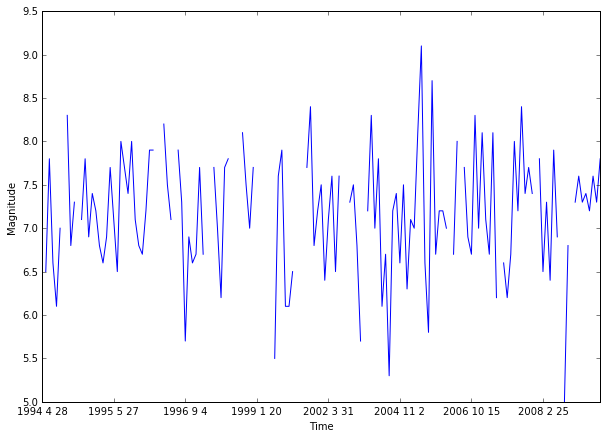

In [31]:
TS_PM=pd.Series(D['PRIMARY_MAGNITUDE'].values,index=D['YEAR_MONTH_DAY'])
L=len(TS_PM)

from IPython.html.widgets import interact

def plot_slice(start=0,ende=L):
    figure(figsize=(10,7))
    TS_PM[start:ende].plot()
    xlabel('Time')
    ylabel('Magnitude')
    
res=interact(plot_slice,start=(0,L,1),ende=(0,L,1))

## Basemap visualization

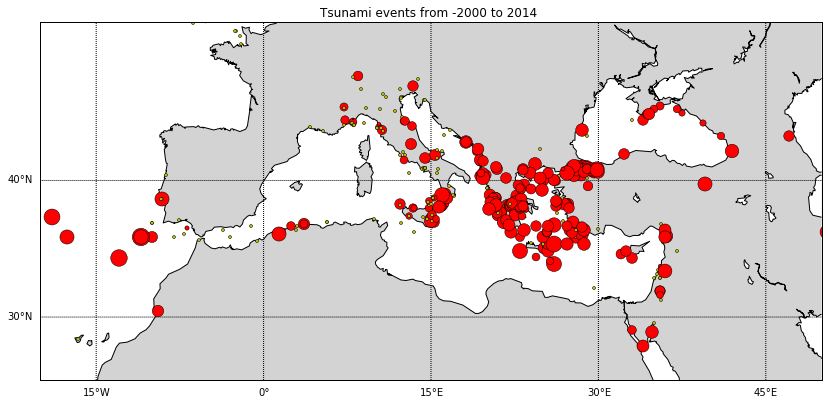

In [11]:
from mpl_toolkits.basemap import Basemap
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
figure(figsize=(14,10))
m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=50,\
            llcrnrlon=-20,urcrnrlon=50,lat_ts=40,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='lightgrey',lake_color='white')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=(True,False,False,False))
m.drawmeridians(np.arange(-180.,181.,15.),labels=(False,False,False,True))
m.drawmapboundary(fill_color='white')

# Chose index
start=0
ende=2509

date1=str(D['YEAR_MONTH_DAY'][start])[0:5]
date2=str(D['YEAR_MONTH_DAY'][ende])[0:5]

for i in range(start,ende):
    mag=D['PRIMARY_MAGNITUDE'][i]
    x,y=m(D['LONGITUDE'][i],D['LATITUDE'][i])
    if isfinite(mag):
        plot([x],[y],'ro',ms=(mag-3)*3)
    else:
        mag=3.0
        plot([x],[y],'yo',ms=mag) # Use yellow if mag not available
        
title("Tsunami events from " +date1+' to '+date2)